# Lecture Outliers

***

 ## Exercise 1

Create box plots on a single set of axes for all five experiments in the morley data set.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.picostat.com/system/files/datasets/dataset-77488.csv'
dfM = pd.read_csv(url)
print(dfM.head())

   Expt  Run  Speed
0     1    1    850
1     1    2    740
2     1    3    900
3     1    4   1070
4     1    5    930


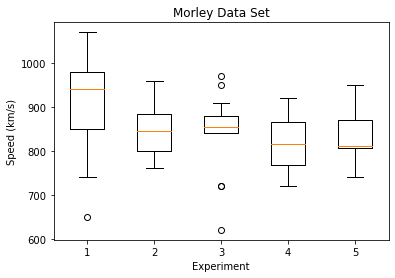

In [3]:
# Separete the experiments using header "Expt"
exp1 = dfM[dfM['Expt'] == 1]['Speed']
exp2 = dfM[dfM['Expt'] == 2]['Speed']
exp3 = dfM[dfM['Expt'] == 3]['Speed']
exp4 = dfM[dfM['Expt'] == 4]['Speed']
exp5 = dfM[dfM['Expt'] == 5]['Speed']

# Creating boxplots on each experiment on single set axes
fig, ax = plt.subplots()
ax.boxplot([exp1, exp2, exp3, exp4, exp5])

ax.set_title('Morley Data Set')
ax.set_xlabel('Experiment')
ax.set_ylabel('Speed (km/s)')

plt.show()

## Exercise 2

Create box plots for all of the numercial variables in Fisher's Iris Data Set.

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
# The raw csv file at the UCI Machine Learning repository does not have the attribute information included in the csv file
# Create a list of column names col_names using the iris attribute information
# https://www.angela1c.com/projects/iris_project/downloading-iris/
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
dfI =  pd.read_csv(url, names = col_names)

print(dfI.head())

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width      Species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


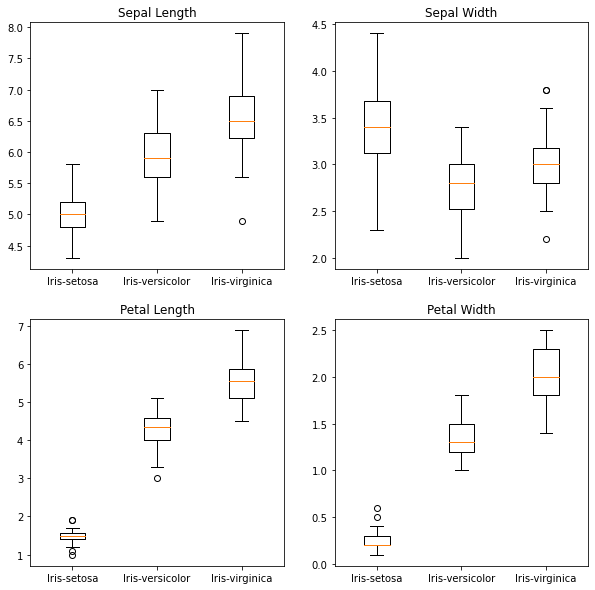

In [5]:
# Group the DataFrame by the flower species
grouped = dfI.groupby('Species')

# Extract the data for each numerical variable
Sepal_Length = grouped['Sepal_Length'].apply(list)
Sepal_Width = grouped['Sepal_Width'].apply(list)
Petal_Length = grouped['Petal_Length'].apply(list)
Petal_Width = grouped['Petal_Width'].apply(list)

# Create the box plots
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].boxplot(Sepal_Length)
ax[0, 1].boxplot(Sepal_Width)
ax[1, 0].boxplot(Petal_Length)
ax[1, 1].boxplot(Petal_Width)

# Set the custom labels for the x-axis
ax[0, 0].set_xticklabels(dfI['Species'].unique())
ax[0, 1].set_xticklabels(dfI['Species'].unique())
ax[1, 0].set_xticklabels(dfI['Species'].unique())
ax[1, 1].set_xticklabels(dfI['Species'].unique())

# Add a title and labels to the plot
ax[0, 0].set_title('Sepal Length')
ax[0, 1].set_title('Sepal Width')
ax[1, 0].set_title('Petal Length')
ax[1, 1].set_title('Petal Width')

plt.show()

## Exercise 3

Adapt the below code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

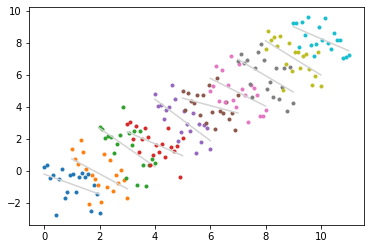

In [7]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])
# Create a series of x vectors.
ys = np.array([-1.0 * xs[i] + 2 * i for i in range(len(xs))])

# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');